## 曲线上的随机采样：数值+解方程

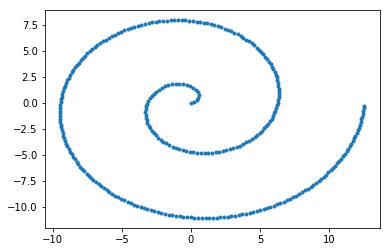

In [4]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

def func(t):
    # 被积部分
    return np.sqrt(1 + np.square(t))


from scipy import integrate

s, _ = integrate.quad(func, 0, 4 * np.pi)  # 分母

result = []
for i in range(300):
    # r = np.random.rand()
    r = i / 300
    t = opt.fsolve(lambda t: integrate.quad(func, 0, t)[0] / s - r, [0], fprime=func)
    x = t * np.cos(t)
    y = t * np.sin(t)
    result.append([x, y])

result = np.array(result)

plt.plot(result[:, 0], result[:, 1], '.')
plt.show()


## 曲线上的随机采样：采样

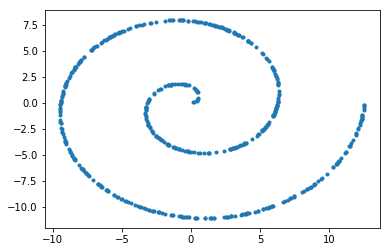

In [2]:
import scipy.optimize as opt
import numpy as np


def func(t):
    # 被积部分
    return np.sqrt(1 + np.square(t))


left, right = 0, 4 * np.pi
m = -opt.minimize(fun=lambda t: -func(t), x0=np.array([0.1]),
                  method=None, jac=None,
                  bounds=((left, right),)).fun[0]

t_list = []
for i in range(1000):
    t = np.random.rand() * (right - left) + left
    if func(t) / m > np.random.rand():
        t_list.append(t)

x = t_list * np.cos(t_list)
y = t_list * np.sin(t_list)
plt.plot(x, y, '.')
plt.show()

## 曲面上的随机采样

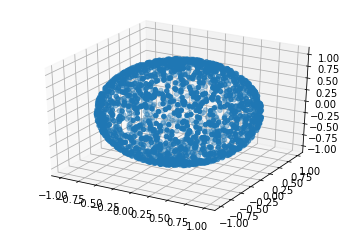

In [3]:
import numpy as np
import scipy.optimize as opt
from scipy.misc import derivative


# 参数方程$r=r(u,v)$
def func(u, v):
    x = np.sin(u) * np.cos(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(u)
    return x, y, z


# r对u的偏导数，可以手算，这里用数值方法
def func_r_u(u, v):
    return derivative(lambda u: func(u, v)[0], u), \
           derivative(lambda u: func(u, v)[1], u), \
           derivative(lambda u: func(u, v)[2], u)


# r对v的偏导数
def func_r_v(u, v):
    return derivative(lambda v: func(u, v)[0], v), \
           derivative(lambda v: func(u, v)[1], v), \
           derivative(lambda v: func(u, v)[2], v)


def func_I(u, v):
    r_u = func_r_u(u, v)
    r_v = func_r_v(u, v)
    E = np.linalg.norm(r_u, ord=2)
    G = np.linalg.norm(r_v, ord=2)
    F = np.dot(r_u, r_v)
    return np.sqrt(E * G - F ** 2)


left, right = 0, 2 * np.pi
m = -opt.minimize(fun=lambda t: -func_I(t[0], t[1]), x0=np.array([0.1, 0.1]),
                  bounds=((left, right), (left, right))).fun

m = m + 0.1
# %%
points = np.random.rand(3000, 2) * np.pi * 2
result = []
for point in points:
    if func_I(point[0], point[1]) / m > np.random.rand():
        result.append(point)

# %%画图

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y, Z = [], [], []
for point in result:
    u, v = point
    x, y, z = func(u, v)
    X.append(x)
    Y.append(y)
    Z.append(z)

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

surf = ax.scatter(X, Y, Z, '.')
plt.show()